
# Regression Models on Ames Real Estate Data

_Author: Alex Chicote (NYC)_

---
<img src="./photo303159.jpeg" style="float: center; margin: 20px; height: 300px">

        Is it possible to predict the price of sale for a real estate unit in Ames IA?

        What are the most important factors to determine it?

## Plan of Action

### Steps:



   - [1. Importing all the modules and dataframes from Notebook(AChicote-Project-3-NB-1-EDA).](#importing)
   - [2. Finding the baseline (score to beat).](#baseline) 
   - [3. Spliting train and set data and scale it.](#scaling)
   - [4. Trying different models with all features.](#models)
   - [5. Repeat the process while filtering (eliminating) models and features until reaching the score.](#second_try)
   - [6. Evaluating the final model and plotting it.](#plotting)
   

<a id='importing'></a>

In [1]:
                        # Importing all necessary modules (and more)
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.svm import SVR
%matplotlib inline

In [2]:
##loading data(train)
file ='final_train.csv'
train = pd.read_csv(file)
train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,sale_condition
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,1,Normal
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,1,Normal
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,1,Abnorml
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,1,Normal
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,1,Normal


In [3]:
##Repeating the process in test
##loading data(test)
file ='final_test.csv'
test = pd.read_csv(file)
#
test.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,misc_feature_Shed,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
##Making sure we have no surprises
TEST = set(test.columns)
TRAIN = set(train.columns)
diff = TRAIN - TEST
DIFF = TEST - TRAIN
print(diff, DIFF)
train.drop('sale_condition', axis =1, inplace=True)

{'saleprice', 'sale_condition'} set()


In [10]:
train.shape

(2051, 280)

<a id='baseline'></a>
# Baseline = 79239.33

In [5]:
##Baseline
train['mean'] = train['saleprice'].mean()

y_test = train['saleprice'].values
prediction_mean = train['mean'].values
baseline = np.sqrt(mean_squared_error(y_test, prediction_mean))
print(baseline)


79239.3350416


In [6]:
##Selecting all possible features.
features = [c for c in train.columns if c not in ['saleprice', 'mean']]


<a id='models'></a>
# DIFFERENT MODELS  

## Score: Root Mean Squared Error
### RMSE: np.sqrt(metrics.mean_squared_error(true, predictions))


#### Before that and in every case I will first scale my data



    1. AdaBoostRegressor.
    2. GradientBoostingRegressor. 
    3. LinearRegression (plain) and with regularization: Lasso, Ridge ElasticNet.
    4. SupportVectorRegressor as SVR.
    
## First Try
### Best Score: 33836

In [7]:
first_try = 33836

<a id='scaling'></a>

In [ ]:
X = train[features].copy()
y = train['saleprice'].copy()
XT = test.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
XTs = ss.fit_transform(XT)

##AdaBoost
ada = AdaBoostRegressor()
ada_params = {'n_estimators': [25, 50, 75],
             'loss': ['linear', 'square', 'exponential']}
ada_model = GridSearchCV(ada, param_grid=ada_params)
ada_model.fit(Xs_train, y_train)
print('best score', ada_model.best_score_)
print('best params', ada_model.best_params_)
print('test score', ada_model.score(Xs_test, y_test))
predictions = ada_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)

##GBoost

gbc = GradientBoostingRegressor()
gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
gbc_model.fit(Xs_train, y_train)
print('best score', gbc_model.best_score_)
print('best params', gbc_model.best_params_)
print('test score', gbc_model.score(Xs_test, y_test))
prediction = gbc_model.predict(XTs)
test['SalePrice'] = prediction
predictions = gbc_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)
##LinearRegression
lr = LinearRegression()
lr_params = {}
lr_model = GridSearchCV(lr, param_grid=lr_params)
lr_model.fit(Xs_train, y_train)
print('best score', lr_model.best_score_)
print('best params', lr_model.best_params_)
print('test score', lr_model.score(Xs_test, y_test))
predictions = lr_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)
##LAsso
lasso = Lasso()
lasso_params = {'alpha': [50, 75, 100, 200, 500, 1000]}
lasso_model = GridSearchCV(lasso, param_grid=lasso_params)
lasso_model.fit(Xs_train, y_train)
print('best score', lasso_model.best_score_)
print('best params', lasso_model.best_params_)
print('test score', lasso_model.score(Xs_test, y_test))
predictions = lasso_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)
##Ridge
ridge = Ridge()
ridge_params = {'alpha': np.logspace(0, 5, 200)}
ridge_model = GridSearchCV(ridge, param_grid=ridge_params)
ridge_model.fit(Xs_train, y_train)
print('best score', ridge_model.best_score_)
print('best params', ridge_model.best_params_)
print('test score', ridge_model.score(Xs_test, y_test))
predictions = ridge_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)
##ElasticNet
en = ElasticNet()
en_params = {'alpha': np.arange(0.01, 20.0, 0.010)}
en_model = GridSearchCV(en, param_grid=en_params)
en_model.fit(Xs_train, y_train)
print('best score', en_model.best_score_)
print('best params', en_model.best_params_)
print('test score', en_model.score(Xs_test, y_test))
en.fit(Xs_train, y_train)
predictions = en_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)

svm = SVR()

svm_params = {'C': range(20,40),
             'kernel': ['linear', 'poly', 'rbf']}
svm_model = GridSearchCV(svm, param_grid=svm_params)
svm_model.fit(Xs_train, y_train)
print('best score', svm_model.best_score_)
print('best params', svm_model.best_params_)
print('test score', svm_model.score(Xs_test, y_test))
predictions = svm_model.predict(Xs_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)

In [18]:
X = train[features].copy()
y = train['saleprice'].copy()
XT = test.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
XTs = ss.fit_transform(XT)


In [ ]:
##44000
prediction = ada_model.predict(XTs)
test['SalePrice'] = prediction
for_kaggle = test[['id', 'SalePrice']]
for_kaggle.loc[for_kaggle['SalePrice'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('Baseline3.csv', index=False, encoding='utf-8')

## Conclusions after first try: 
### The best model is GradientBoostingRegressor
### I will only use from now on (I am dropping the rest): GradientBoosting, ELasticNet and SVR 


# FEATURE SELECTION

Will proceed to select 100 variables out of the 280 that I started with. Will do it as follows:

- [1.Correlation: Select the 100 features most correlated with the target](#correlation)

- [2.Lasso: Select the 100 features with the biggest coefficients in Lasso](#lasso)

- [3.Select the 100 features using Recursive Feature Elimination](#rfe)

- [4.Select 100 with SelektBest](#sb)

- [5.Select the features that are in all 4 selections above or in two of them](#selection)


PT- I am taking 200 in case I want to use more later on.

<a id='second_try'></a>
## Second Try 
### Best Score: 21348

In [8]:
second_try = 21348

<a id='correlation'></a>

### Correlation

In [19]:
corr_list = train.corr()['saleprice'].apply(lambda x: abs(x)).sort_values(ascending=False).head(101)
corr_selection = (corr_list.index)[1:]

<a id='lasso'></a>
### Lasso

In [20]:
lasso = Lasso()
lasso.fit(Xs_train, y_train)
lasso_features = []
for i, col in enumerate(X_train.columns):
        t = list([col, lasso.coef_[i]])
        lasso_features.append(t)
        lasso_features.sort(key=lambda x: x[1])
        lasso_features.reverse()
lasso_features[0:50]
lasso_selection = []
for item in lasso_features[0:101]:
    lasso_selection.append(item[0])


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<a id='rfe'></a>
### Recursive Feature Elimination (rfe)

In [ ]:
<a id='rfe'></a>
svm = SVR(kernel='linear')
rfe = RFE(svm, n_features_to_select=100, verbose=2)

rfe.fit(Xs_train, y_train)
rfe_selection = []
for i, col in enumerate([col for col in train.columns if col not in['saleprice', 'mean', 'sale_condition']]):
    if rfe.support_[i] == True:
        rfe_selection.append(col)

In [ ]:
rfe = pd.DataFrame(rfe_selection)
rfe.to_csv('rfe_selection.cvs', index=False, encoding='utf-8')

<a id='sb'></a>
### SelectBest

In [ ]:
selectkbest = SelectKBest(score_func=f_regression, k=101)
selectkbest.fit(Xs_train, y_train)

In [17]:
sb_selection = X_train.iloc[:, selectkbest.get_support()].columns
sb_selection

NameError: name 'X_train' is not defined

<a id='selection'></a>
### Selection

In [21]:
#Making sure i do not have some surprise later
corr_selection = [c for c in corr_selection if c not in ['saleprice', 'mean', 'sale_condition']]
lasso_selection = [c for c in lasso_selection if c not in ['saleprice', 'mean', 'sale_condition']]
rfe_selection = [c for c in rfe_selection if c not in ['saleprice', 'mean', 'sale_condition']]
sb_selection = [c for c in sb_selection if c not in ['saleprice', 'mean', 'sale_condition']]

    #create some new lists of features
    first_sel = []
    first_sel_in_one = []
    first_sel_in_two = []
    first_sel_in_three = []
    for item in train.columns:
        if item in corr_selection:
            first_sel_in_one.append(item)
            if item in lasso_selection:
                first_sel_in_two.append(item)
                if item in rfe_selection:
                    first_sel_in_three.append(item)
                    if item in sb_selection:
                        first_sel.append(item)

    print('first_sel', len(first_sel),'first_sel_in_one' ,len(first_sel_in_one),'first_sel_in_two',len(first_sel_in_two),\
          'first_sel_in_three', len(first_sel_in_three))

IndentationError: unexpected indent (<ipython-input-21-05d486ad614b>, line 8)

### These are the lists of fetures that I will use

In [ ]:
selections = [corr_selection, lasso_selection, rfe_selection, sb_selection, first_sel, first_sel_in_two]

In [ ]:
for item in selections:
    X = train[item]
    y = train['saleprice']
    XT = test[item]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    ss = StandardScaler()
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    XTs = ss.transform(XT)


    ##GBoost

    gbc = GradientBoostingRegressor()
    gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
    gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
    gbc_model.fit(Xs_train, y_train)
    print('best score', gbc_model.best_score_)
    print('best params', gbc_model.best_params_)
    print('test score', gbc_model.score(Xs_test, y_test))
    prediction = gbc_model.predict(XTs)
    test['SalePrice'] = prediction
    predictions = gbc_model.predict(Xs_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('gbc', RMSE)

    ##ElasticNet
    en = ElasticNet()
    en_params = {'alpha': np.arange(0.01, 20.0, 0.010)}
    en_model = GridSearchCV(en, param_grid=en_params)
    en_model.fit(Xs_train, y_train)
    print('best score', en_model.best_score_)
    print('best params', en_model.best_params_)
    print('test score', en_model.score(Xs_test, y_test))
    en.fit(Xs_train, y_train)
    predictions = en_model.predict(Xs_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('ElasticNet', RMSE)

    svm = SVR()

    svm_params = {'C': range(20,40),
                 'kernel': ['linear', 'poly', 'rbf']}
    svm_model = GridSearchCV(svm, param_grid=svm_params)
    svm_model.fit(Xs_train, y_train)
    print('best score', svm_model.best_score_)
    print('best params', svm_model.best_params_)
    print('test score', svm_model.score(Xs_test, y_test))
    predictions = svm_model.predict(Xs_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('svm', RMSE)

## Conclusions after the second try: 

### The best model still is GradientBoostingRegressor (I am dropping the rest)
### I take to Kaggle the last list to see if I get a better score with less features


In [ ]:
X = train[first_sel_in_two]
y = train['saleprice']
XT = test[first_sel_in_two]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)


##GBoost

gbc = GradientBoostingRegressor()
gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
gbc_model.fit(Xs_train, y_train)
    #print('best score', gbc_model.best_score_)
    #print('best params', gbc_model.best_params_)
    #print('test score', gbc_model.score(Xs_test, y_test))
predictions = gbc_model.predict(Xs_test)
prediction = gbc_model.predict(XTs)
test['SalePrice'] = prediction
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('gbc', RMSE)
for_kaggle = test[['id', 'SalePrice']]
for_kaggle.loc[for_kaggle['SalePrice'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('gbccorr1stselin2.csv', index=False, encoding='utf-8')

## Third Try 
### Best Score: 24871
### I am going to define lists for only 10 features and try again.

In [11]:
third_try =24871

In [13]:
corr_sel = corr_selection[0:11]
lasso_sel = lasso_selection[0:11]
rfe_sel = rfe_selection[0:11]
sb_sel = sb_selection[0:11]

#create some new lists of features
first_sel = []
first_sel_in_one = []
first_sel_in_two = []
first_sel_in_three = []
for item in train.columns:
    if item in corr_sel:
        first_sel_in_one.append(item)
        if item in lasso_sel:
            first_sel_in_two.append(item)
            if item in rfe_sel:
                first_sel_in_three.append(item)
                if item in sb_sel:
                    first_sel.append(item)

print('first_sel', len(first_sel),'first_sel_in_one' ,len(first_sel_in_one),'first_sel_in_two',len(first_sel_in_two),\
          'first_sel_in_three', len(first_sel_in_three))

selections = [corr_sel, lasso_sel, rfe_sel, sb_sel, first_sel, first_sel_in_two]

NameError: name 'corr_selection' is not defined

In [ ]:
for item in selections:
    X = train[item]
    y = train['saleprice']
    XT = test[item]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    ss = StandardScaler()
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    XTs = ss.transform(XT)


    ##GBoost

    gbc = GradientBoostingRegressor()
    gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
    gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
    gbc_model.fit(Xs_train, y_train)
    print('best score', gbc_model.best_score_)
    print('best params', gbc_model.best_params_)
    print('test score', gbc_model.score(Xs_test, y_test))
    prediction = gbc_model.predict(XTs)
    test['SalePrice'] = prediction
    predictions = gbc_model.predict(Xs_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('gbc', RMSE)


In [22]:
X = train[corr_sel]
y = train['saleprice']
XT = test[corr_sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)


##GBoost

gbc = GradientBoostingRegressor()
gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
gbc_model.fit(Xs_train, y_train)
    #print('best score', gbc_model.best_score_)
    #print('best params', gbc_model.best_params_)
    #print('test score', gbc_model.score(Xs_test, y_test))
predictions = gbc_model.predict(Xs_test)
prediction = gbc_model.predict(XTs)
test['SalePrice'] = prediction
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('gbc', RMSE)
for_kaggle = test[['id', 'SalePrice']]
for_kaggle.loc[for_kaggle['SalePrice'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('gbccorr10.csv', index=False, encoding='utf-8')

gbc 21920.6760885


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Scores are worst. I will try again but adding more features

## Last try for now. 
### Best Score: 21682
### I will use  50 features

In [12]:
fourth_try = 21682

In [23]:
corr_sel = corr_selection[0:51]
lasso_sel = lasso_selection[0:51]
rfe_sel = rfe_selection[0:51]
sb_sel = sb_selection[0:51]

#create some new lists of features
first_sel = []
first_sel_in_one = []
first_sel_in_two = []
first_sel_in_three = []
for item in train.columns:
    if item in corr_sel:
        first_sel_in_one.append(item)
        if item in lasso_sel:
            first_sel_in_two.append(item)
            if item in rfe_sel:
                first_sel_in_three.append(item)
                if item in sb_sel:
                    first_sel.append(item)

print('first_sel', len(first_sel),'first_sel_in_one' ,len(first_sel_in_one),'first_sel_in_two',len(first_sel_in_two),\
          'first_sel_in_three', len(first_sel_in_three))

selections = [corr_sel, lasso_sel, rfe_sel, sb_sel, first_sel, first_sel_in_two]

NameError: name 'rfe_selection' is not defined

In [78]:
for item in selections:
    X = train[item]
    y = train['saleprice']
    XT = test[item]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    ss = StandardScaler()
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    XTs = ss.transform(XT)


    ##GBoost

    gbc = GradientBoostingRegressor()
    gbc_params = {'n_estimators': [100, 125, 150, 175], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
    gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
    gbc_model.fit(Xs_train, y_train)
    print('best score', gbc_model.best_score_)
    print('best params', gbc_model.best_params_)
    print('test score', gbc_model.score(Xs_test, y_test))
    prediction = gbc_model.predict(XTs)
    test['SalePrice'] = prediction
    predictions = gbc_model.predict(Xs_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('gbc', RMSE)


best score 0.869526551237
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 150}
test score 0.922046082737
gbc 21877.819357
best score 0.877224572359
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 150}
test score 0.925246892535
gbc 21423.9568825
best score 0.872942171554
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 125}
test score 0.912316777481
gbc 23202.955732
best score 0.878819363676
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 175}
test score 0.911104423901
gbc 23362.8130939
best score 0.85232170496
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 175}
test score 0.913227711161
gbc 23082.1142744
best score 0.862603149606
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
test score 0.914141539332
gbc 22960.2498202


In [39]:
X = train[lasso_sel]
y = train['saleprice']
XT = test[lasso_sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)


##GBoost

gbc = GradientBoostingRegressor()
gbc_params = {'n_estimators': [100, 125, 150, 175, 200], 'max_features': ['auto', 'log2', None], 'max_depth': range(1,4)}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params)
gbc_model.fit(Xs_train, y_train)
print('best score', gbc_model.best_score_)
print('best params', gbc_model.best_params_)
print('test score', gbc_model.score(Xs_test, y_test))
predictions = gbc_model.predict(Xs_test)
prediction = gbc_model.predict(XTs)
test['SalePrice'] = prediction
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('gbc', RMSE)
for_kaggle = test[['id', 'SalePrice']]
for_kaggle.loc[for_kaggle['SalePrice'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('gbclasso50.csv', index=False, encoding='utf-8')

best score 0.880333485676
best params {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}
test score 0.927114341165
gbc 21154.662553


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## I am done for now. Next I will try to tune more the models and/or eliminate features
## It is clear to me that the model to be tuned is Gradient BoostingRegressor

<a id='plotting'></a>
# Plotting

## What are the most important features in my last submission?

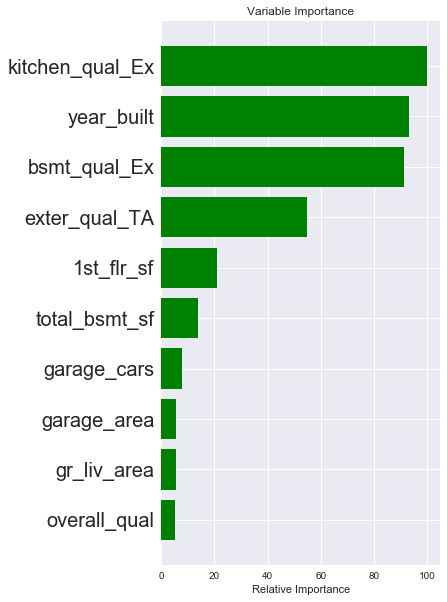

In [25]:
X = train[lasso_sel]
y = train['saleprice']
XT = test[lasso_sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)
gbc = GradientBoostingRegressor(n_estimators=175, max_features='auto', max_depth=3)

gbc.fit(Xs_train, y_train)

# Plot feature importance
feature_importance = gbc.feature_importances_[:10]
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


plt.subplots(figsize=(5,10))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='g')
plt.yticks(pos, corr_selection, fontsize =20)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


# How did I reduced the error?

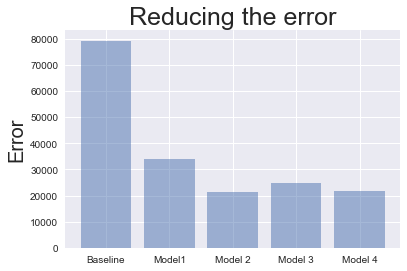

In [27]:
objects = ('Baseline', 'Model1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(objects))
performance = [baseline,first_try,second_try,third_try,fourth_try]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error', fontsize=20)
plt.title('Reducing the error', fontsize=25)
 
plt.show()

In [37]:
corr_sel, feature_importance

(Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
        'total_bsmt_sf', '1st_flr_sf', 'exter_qual_TA', 'bsmt_qual_Ex',
        'year_built', 'kitchen_qual_Ex', 'year_remod/add', 'kitchen_qual_TA',
        'full_bath', 'foundation_PConc', 'totrms_abvgrd', 'mas_vnr_area',
        'exter_qual_Ex', 'fireplace_qu_0', 'fireplaces', 'bsmtfin_type_1_GLQ',
        'bsmt_qual_TA', 'heating_qc_Ex', 'neighborhood_NridgHt',
        'exter_qual_Gd', 'garage_finish_Unf', 'mas_vnr_type_None',
        'bsmtfin_sf_1', 'garage_finish_Fin', 'fireplace_qu_Gd',
        'bsmt_exposure_Gd', 'garage_type_Detchd', 'sale_type_New',
        'garage_type_Attchd', 'foundation_CBlock', 'heating_qc_TA',
        'exterior_1st_VinylSd', 'exterior_2nd_VinylSd', 'open_porch_sf',
        'wood_deck_sf', 'lot_frontage', 'mas_vnr_type_Stone', 'lot_shape_Reg',
        'kitchen_qual_Gd', 'lot_area', 'bsmt_exposure_No', 'paved_drive_Y',
        'bsmt_full_bath', 'half_bath', 'ms_zoning_RM', 'central_air_N

In [38]:
sns.pairplot(pos, feature_importance)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices